# **MAKİNE ÖĞRENMESİ DERSİ**

# **K-MEANS İLE GÖRÜNTÜ KÜMELEME**

**ESRA TÜRKAN **






In [ ]:
import pandas as pd
from matplotlib.image import imread
import os
import random
import tqdm as tqdm
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

import numpy as np


In [ ]:
def getNearCentroids(X,centroids):  
    K = centroids.shape[0] 
    idx = np.zeros((X.shape[0],1))
    
    
    for i in range(X.shape[0]):
        for j in range(K):
            if j == 0:
                difference = X[i,:] - centroids[j,:]
                dif = np.sum(difference**2)
                idx[i] = j
            else:
                difference = X[i,:] - centroids[j,:]
                if np.sum(difference**2) < dif:
                    dif = np.sum(difference**2) 
                    idx[i] = j
                    
    return idx

In [ ]:
def computeCentroids(X,idx,K):
    m , n = X.shape
    centroids = np.zeros((K,n)) 
    occur = np.zeros((K,1))
    
    for i in range(m):
        index = int(np.squeeze(idx[i]))
        centroids[index,:] = centroids[index,:] + X[i,:] 
        occur[index] = occur[index] + 1
    
    return (np.divide(centroids,occur))

Grafik üzerinde kümelenmeyi gösterme 

In [ ]:
def show(X,centroids,idx):
    K = centroids.shape[0]
    m = X.shape[0]
    
    fig , ax = fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,10))
    color = "rgbky"
    for i in range(K):
        index_i_centroid = (idx == i).reshape(m,1)
        ax.scatter(X[index_i_centroid[:,0],0],X[index_i_centroid[:,0],1],c = color[i%5],s=40)
        
        
        
    plt.scatter(centroids[:,0],centroids[:,1],c = "m",s = 120)
    plt.tight_layout()

K-MEANS FONKSİYONU

In [ ]:
def kmeans_custom(X,k,max_iters):
    randidx = np.random.permutation(X.shape[0])
    initial_centroids= X[randidx[0:k],:]
    m,n = X.shape
    k = initial_centroids.shape[0]
    print("K is : ",K)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    
    for i in range(max_iters):
        
        idx = getNearCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)
        
    
    return [centroids,idx]

RENK AZALTMA İÇİN FONKSİYON

In [ ]:
def quantization(image,k):
    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    
    centroids , idx = KMeans_Image(i,k,num_iters)
    final_img=image
    for i in range(K):
        final_img[(np.squeeze((idx == i))),:] = centroids[i]

    final_img = final_img.reshape(image.shape[0],image.shape[1],image.shape[2])
    return final_img

VERİSETİNDEN ÖRNEK BİR RESİM ÜZERİNDE RENK AZALTMA İŞLEMİ

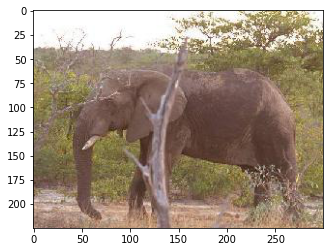

In [ ]:
image = imread("/content/drive/MyDrive/uygulamalar/makine_ogrenmesi/HW2/dataset/elephant/image_0001.jpg")
plt.imshow(image)

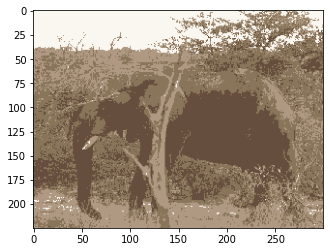

In [ ]:
plt.imshow(quantimage(image,4))
plt.show()

In [ ]:
def read_dataset(folder):
    directory="/content/drive/MyDrive/uygulamalar/makine_ogrenmesi/HW2/dataset/"
    for i in tqdm.tqdm(os.listdir(directory+folder)):
        full_path = os.path.join(directory+folder,i)
        img = cv2.imread(full_path,1)
        img = cv2.resize(img,(256,256))

        quantimge=quantization(img,32)

        images.append(quantimge)
        images_old.append(img)
        classes.append(folder)
    return images,classes

images = []
images_old=[]
classes= [] 
dataset =[]

images,classes= read_dataset("octopus")
images,classes= read_dataset("elephant")
images,classes= read_dataset("flamingo")
images,classes= read_dataset("kangaroo")
images,classes= read_dataset("leopards")
images,classes= read_dataset("sea_horse")
images,classes= read_dataset("sunflower")

100%|██████████| 20/20 [01:24<00:00,  4.21s/it]


In [ ]:
len(images)

140

In [ ]:
images[0].shape

(256, 256, 3)

ÖRNEK VERİLER

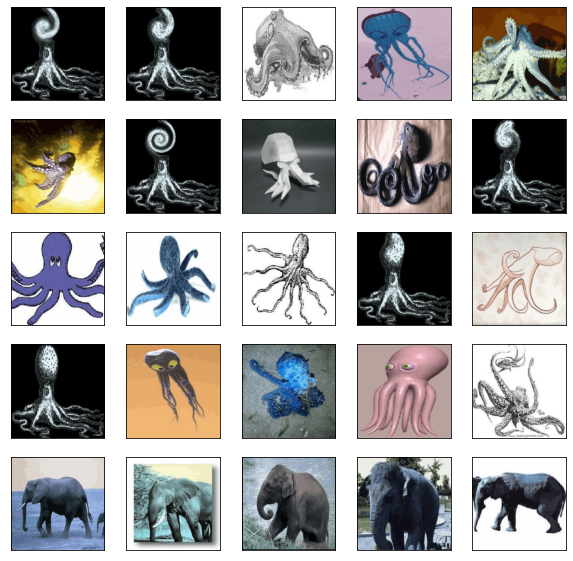

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()

HİSTOGRAM FONKSİYONU - Her bir resmin RGB kanallarının ayrı ayrı histogramı alınır. Bir resim için 3 adet 32 elemanlı histogram elde edilir. 

In [ ]:
def getHistogram(img):
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)
    histogram_list = []


    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            img[:, :, channel_id], bins=32, range=(0, 32)
        )
        histogram=histogram/img.size
        histogram_list.append(histogram)
    return histogram_list

VERİ SETİNDEKİ ÖRNEKLERİN HİSTOGRAMININ HESAPLANMASI

In [ ]:
imge_histogram_array=[]
for img in images :
    img_histogram=getHistogram(img)
    
    imge_histogram_array.append(getHistogram(img))


In [ ]:
len(imge_histogram_array[0][0])

32

In [ ]:
array= np.array(imge_histogram_array)

In [ ]:
array.shape

(140, 3, 32)

In [ ]:
nsamples, nx, ny = array.shape


In [ ]:
reshaped_array=array.reshape((nsamples,nx*ny))

In [ ]:
reshaped_array.shape

(140, 96)

In [ ]:
X=reshaped_array

K-MEANS İLE KÜMELEME 

In [ ]:
num_iters=10
K=5
centroids , idx = kmeans_custom(X,K,num_iters)

K is :  5


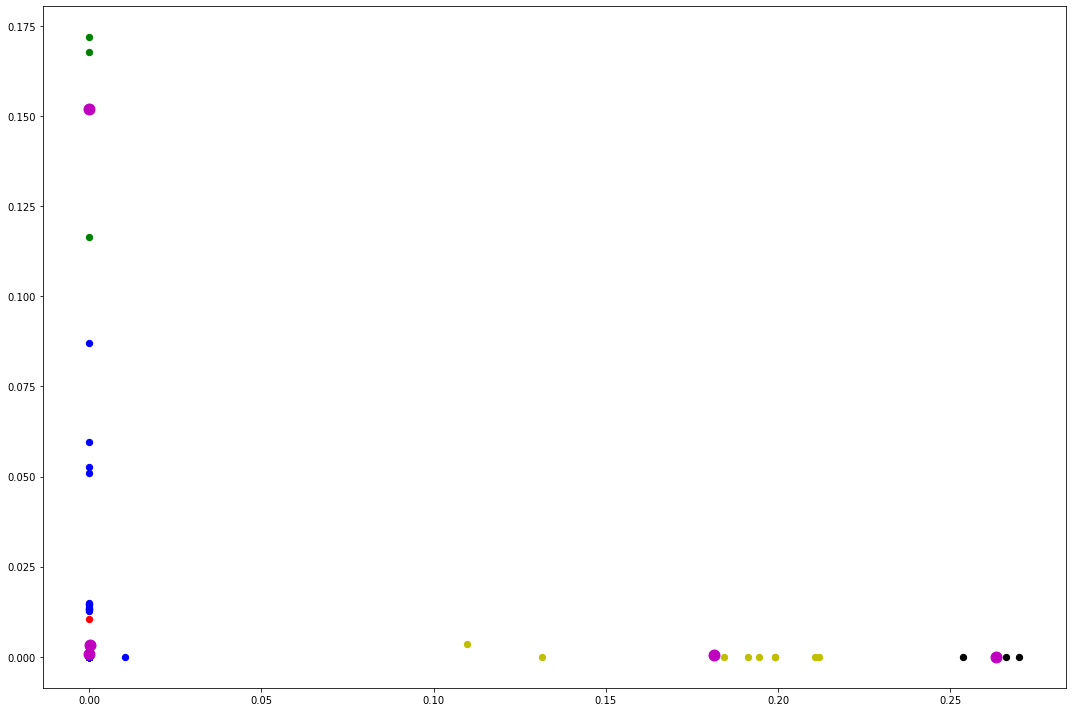

In [ ]:
show(X,centroids,idx)

In [ ]:
idx

ACCURACY HESAPLANMASI

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
classes=le.fit_transform(classes)
print(classes)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
idx=le.fit_transform(idx)
print(idx)

[1 1 2 2 3 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 1 1 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 1 3 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 0 2 0 1 2
 2 2 1 3 2 3 2 2 4 2 3 2 2 2 3 2 2 3 2 3 2 2 2 3 4 4 2 2 2]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

import numpy as np
acc = np.sum(np.equal(classes, idx)) / len(classes)

In [ ]:
acc

0.17142857142857143